# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

# Objective:

To build a model to predict likelihood of visa. 

### Import necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

# Library to split data
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

!pip install -U seaborn
!pip install xgboost

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

##!pip install -U scikit-learn --user


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

sns.set()


# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
)

# libaries to help with data visualization
import matplotlib.pyplot as plt


# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
)

### Read the dataset

In [2]:
EVP = pd.read_csv("EVP.csv")
# copying data to another varaible to avoid any changes to original data
df = EVP.copy()
data = EVP.copy()

In [3]:
# Note: 'df' will be used for machine learning; data exploration will be done on the 'data' copy of the dataset. 

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

In [5]:
# The data contains a lot of textual information. 

In [6]:
data.tail()

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South         77092.57         Year                  Y   
25476            Northeast        279174.79         Year                  Y   
25477                South        146298.85         Year                  N   
25478                 West         86154.77         Year                  Y   
25479              Midwest         70876.91         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

### Understand the shape of the dataset.

In [7]:
data.shape

(25480, 12)

* There are 25,480 observations and 12 columns in the dataset

### Check the data types of the columns for the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Summary of the dataset.

In [9]:
data.describe().T

count          mean           std        min       25%  \
no_of_employees  25480.0   5667.043210  22877.928848   -26.0000   1022.00   
yr_of_estab      25480.0   1979.409929     42.366929  1800.0000   1976.00   
prevailing_wage  25480.0  74455.814592  52815.942327     2.1367  34015.48   

                      50%          75%        max  
no_of_employees   2109.00    3504.0000  602069.00  
yr_of_estab       1997.00    2005.0000    2016.00  
prevailing_wage  70308.21  107735.5125  319210.27

**Observations-**
Data Overview
- There are 25480 records in 12 columns; This will expand to over 25 columns after data processing
- There are nine object  type rows of data, one float and two integers. 
- One category (no_of_employees) has negative numbers. This is treated as a typo. 
- There are no missing values
- Not all values are numeric; All values will be transmuted to numeric for analysis
- Unit_of_wage and prevailing_wage must be combined to have a standard measure of annual pay; 
- Our goal is that data is normalized to ensure same scale of comparison

### EDA

### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on number of employees

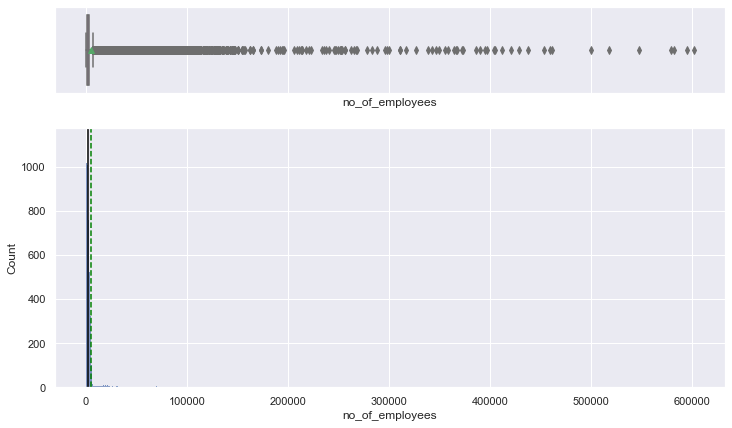

In [11]:
histogram_boxplot(data, "no_of_employees")

* The "no_of_employees" distribution is nearly asymmetric with some large outliers to the right. The mean and median values are close together.
* The "no_of_employees" outliers present to the right indicate some companies have a huge number of employees (602069).

### Observations on business year of establishment

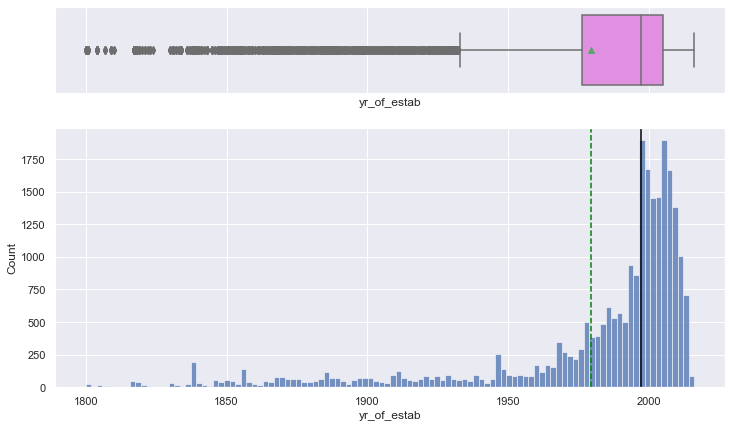

In [12]:
histogram_boxplot(data, "yr_of_estab")

* The data in "yr_of_estab" appears left skewed. the mean and median are significantly seperate. There are significant outliers meaning that while a mojority of employers are modern, some have been around since 1800. 

### Observations on prevailing wage

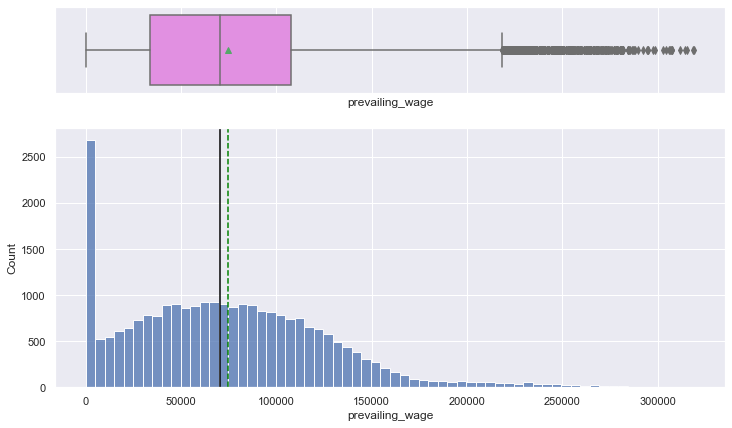

In [13]:
histogram_boxplot(data, "prevailing_wage")

* Prevailing_wage has a slightly right-skewed distribution with mean and median close together.

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

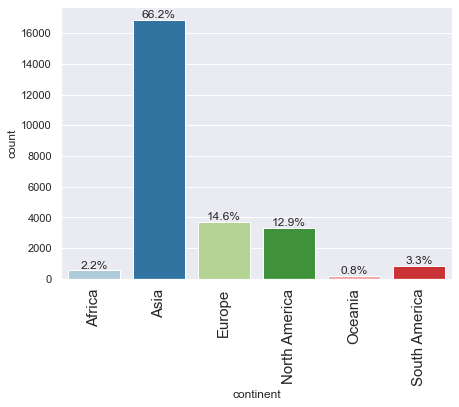

In [15]:
labeled_barplot(data, "continent", perc=True)

* 66% of applicants are from Asia. 

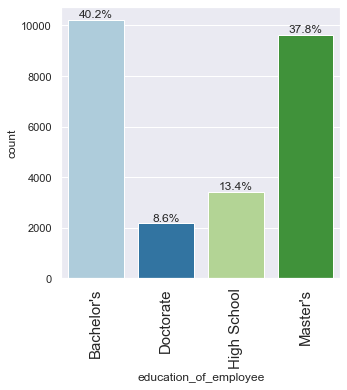

In [16]:
labeled_barplot(data, "education_of_employee", perc=True)

* In "education_of_employee" 78% of the applicants have a Bachelor's or Master's degree. Only 8.6% attain Doctorates. 

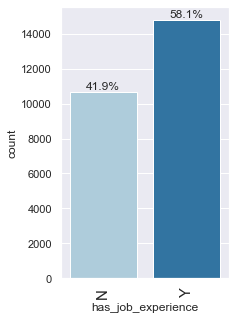

In [17]:
labeled_barplot(data, "has_job_experience", perc=True)

* a majority of the candidates have job experience (58.1%). 

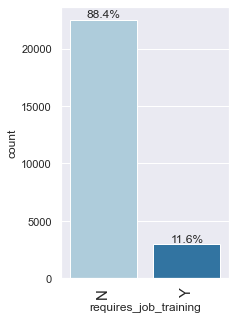

In [18]:
labeled_barplot(data, "requires_job_training", perc=True)

In [19]:
* only 12% of the applicants are applying for a position that requires job training. 

SyntaxError: invalid syntax (<ipython-input-19-ea17bcfd45a8>, line 1)

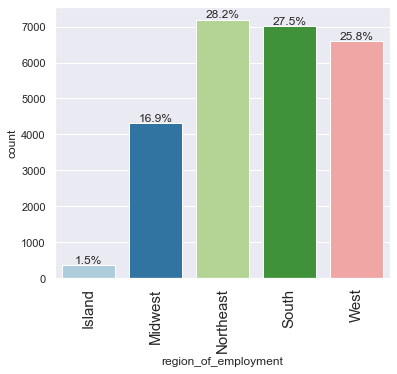

In [20]:
labeled_barplot(data, "region_of_employment", perc=True)

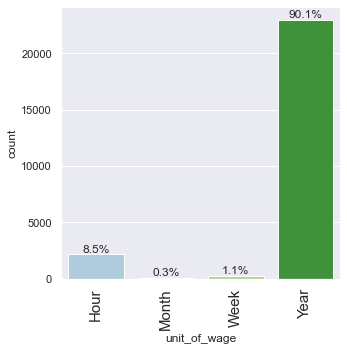

In [21]:
labeled_barplot(data, "unit_of_wage", perc=True)

* a vast majority of applicants have salaries calculated yearly. 

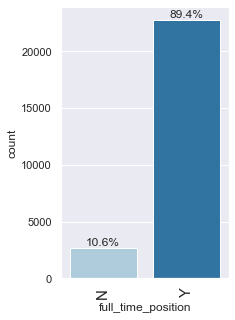

In [22]:
labeled_barplot(data, "full_time_position", perc=True)

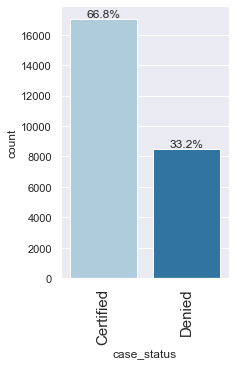

In [23]:
labeled_barplot(data, "case_status", perc=True)

Over 8000 applicants were denied a visa. Close to 1/3 of all applicants are denied at this time. 

## Bivariate Analysis

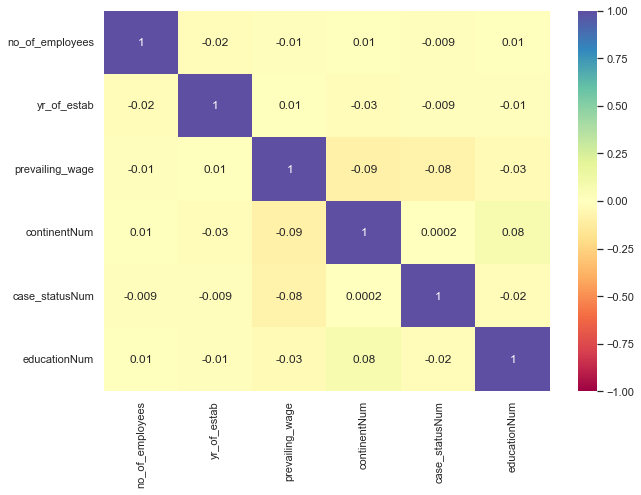

In [49]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".1g", cmap="Spectral")
plt.show()

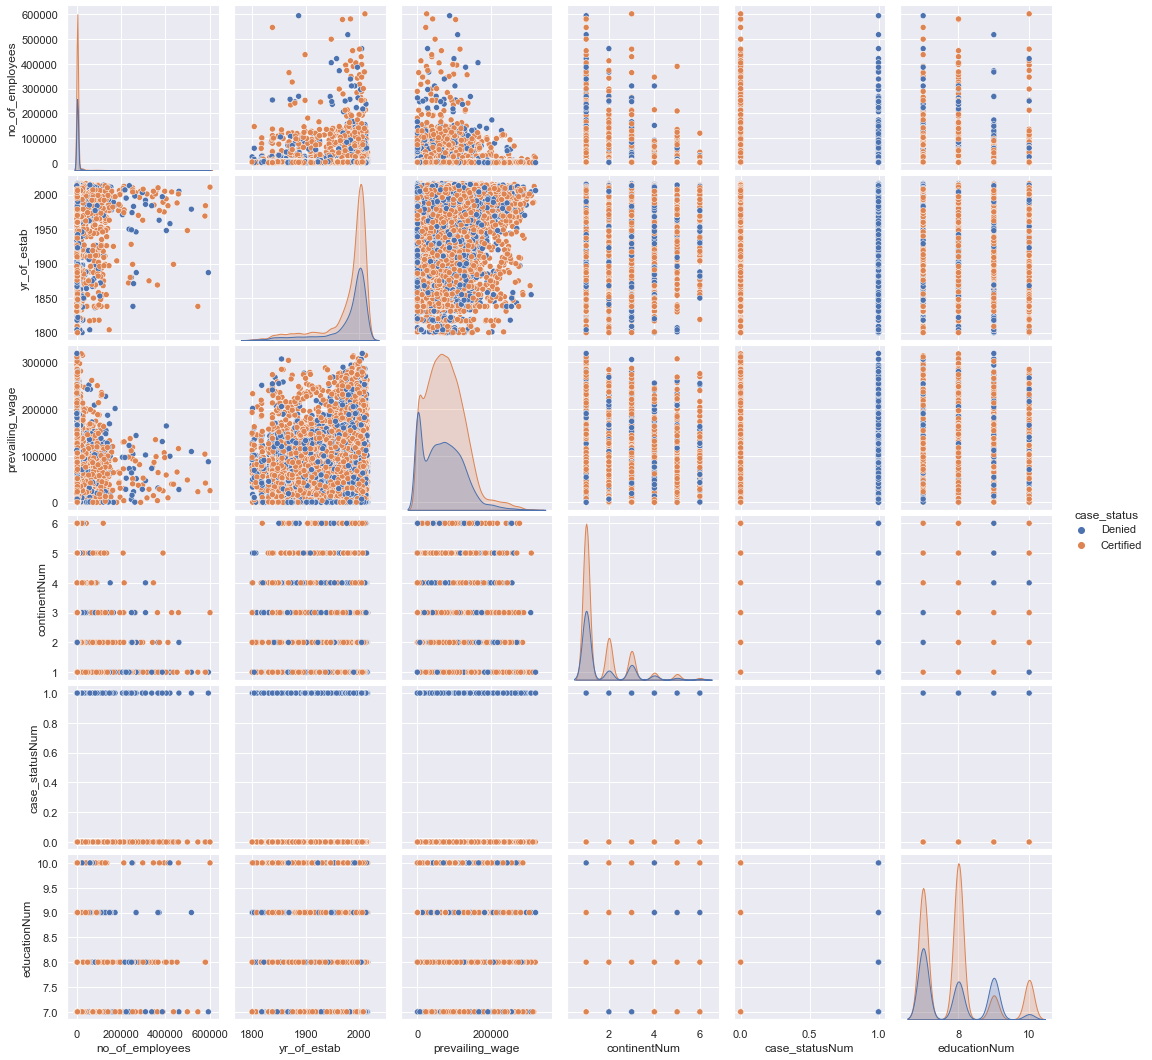

In [50]:
sns.pairplot(data, hue="case_status")
plt.show()

* There is quite a bit of overlap in the distribution of variables for both classes in case_status.

In [51]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


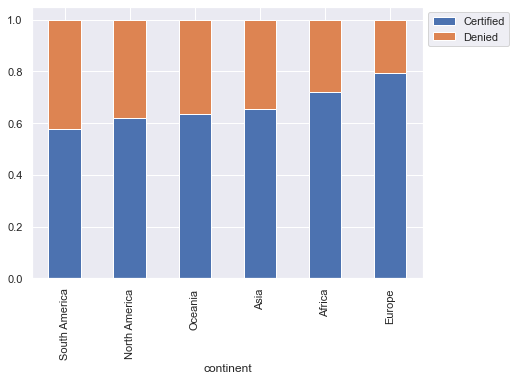

In [52]:
stacked_barplot(data, "continent", "case_status")

* Eurpe has nearly 80% of applicants for visa's approved. 

In [53]:
def continent_to_numeric(x):  # continent will also need to be numeric.
    if x == "Asia":
        return 1
    if x == "Europe":
        return 2
    if x == "North America":
        return 3
    if x == "South America":
        return 4
    if x == "Africa":
        return 5
    if x == "Oceania":
        return 6


data["continentNum"] = data["continent"].apply(continent_to_numeric)
print(data)

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

In [54]:
def case_to_numeric(x):  # continent will also need to be numeric.
    if x == "Certified":
        return 0
    if x == "Denied":
        return 1


data["case_statusNum"] = data["case_status"].apply(case_to_numeric)
print(data)

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

### Education vs certification

In [55]:
def education_to_numeric(x):  # education will also need to be numeric.
    if x == "Bachelor's":
        return 7
    if x == "Master's":
        return 8
    if x == "High School":
        return 9
    if x == "Doctorate":
        return 10


data["educationNum"] = data["education_of_employee"].apply(education_to_numeric)
print(data)

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

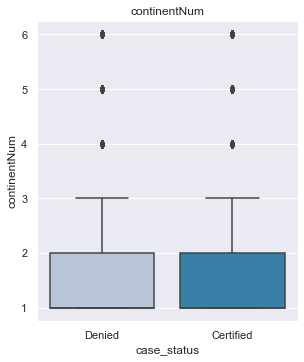

In [56]:
cols = data[["continentNum"]].columns.tolist()
plt.figure(figsize=(12, 5))

for i, variable in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data["case_status"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
    plt.show()

### Education vs Case Status

In [57]:
# Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
# 1. case_status vs. education_of_employee

* Increasing education increases probability of visa certification. 

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


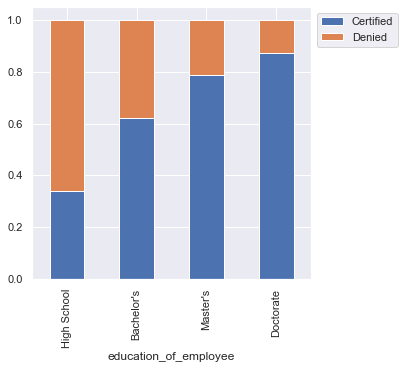

In [58]:
stacked_barplot(data, "education_of_employee", "case_status")

### Continent vs Case Status

In [59]:
# How does the visa status vary across different continents?
# 2. case_status vs continent

- There is variance between continents in visa certification. 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


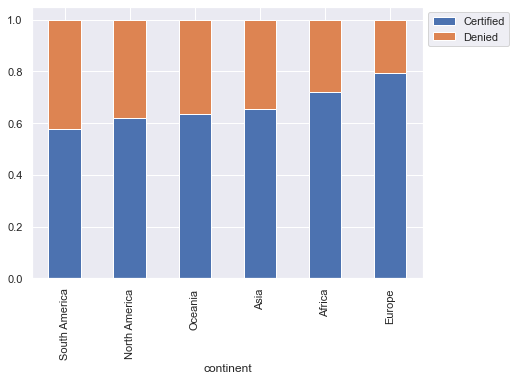

In [60]:
stacked_barplot(data, "continent", "case_status")

### Experience vs Case Status

In [61]:
# Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
# 3. case_status vs has_job_experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


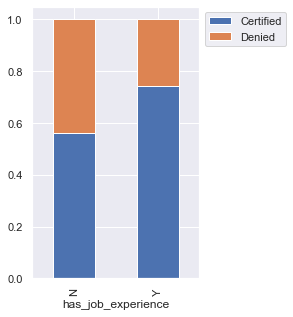

In [62]:
stacked_barplot(data, "has_job_experience", "case_status")

### Unit of Wage vs Case Status

In [63]:
# In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
# 4. case_status vs unit_of_wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


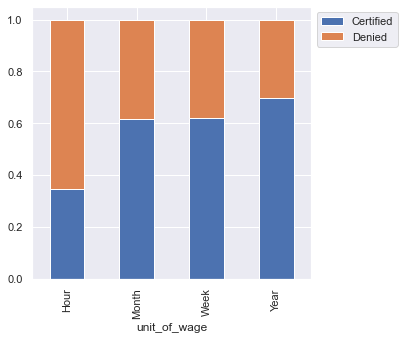

In [64]:
stacked_barplot(data, "unit_of_wage", "case_status")

### Prevailing Wage vs Case Status

In [65]:
        # The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
# 5. case_status vs prevailing_wage
# note- this also can be compared to my annual_value column to see if the annual value of the employee correlates to case status.

In [66]:
import plotly.express as px
fig = px.box(df, x='prevailing_wage', y='case_status')
fig

* Prevailing_wage is not normalized to ensure that the applicants are compared on a fair scale.  

### Observations
- There are 25480 records in 12 columns; This will expand to 25 columns after data processing
- No negative values
- No missing values
- All values are numeric
- Data is normalized to ensure same scale of comparison
- The "no_of_employees" distribution is nearly asymmetric with some large outliers to the right. The mean and median values are close together.
- The "no_of_employees" outliers present to the right indicate some companies have a huge number of employees (602069).
- The data in "yr_of_estab" appears left skewed. the mean and median are significantly seperate. There are significant outliers meaning that while a mojority of employers are modern, some have been around since 1800. 
- Prevailing_wage has a slightly right-skewed distribution with mean and median close together.
- Within the "continent" data set, 66% of the data come from the continent of Asia. 
- In "education_of_employee" 78% of the applicants have a Bachelor's or Master's degree. Only 8.6% attain Doctorates.
- In "has_job_experience" a majority of the candidates have job experience (58.1%).
- In "requires_job_training, 88.4% of applicants select positions that do not require on the job training. 
- 89% of applicants seek "full_time_position".
- In "case_status: 67% of applicants are approved. yet, there still was a gap of 923,978 applicants for visas. 
- Increasing education increases probability of visa certification.
- Work experience is favorable to recieve visa approval. 
- calculating annual value requires multiplying all pay incrememts to calcualte annual salary. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [67]:
df

case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                         N             2412         2002   
2                         Y            44444         2008   
3                         N               98         1897   
4                         N             1082         2005   
...                     ...              ...          ...   
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
0                     West         592.2029         Hour                  Y   
1                Northeast       83425.6500         Year                  Y   
2                     West      122996.8600         Year                  Y   
3                     West       83434.0300         Year                  Y   
4                    South      149907.3900         Year                  Y   
...                    ...              ...          ...                ...   
25475                South       77092.5700         Year                  Y   
25476            Northeast      279174.7900         Year                  Y   
25477                South      146298.8500         Year                  N   
25478                 West       86154.7700         Year                  Y   
25479              Midwest       70876.9100         Year                  Y   

      case_status  
0          Denied  
1       Certified  
2          Denied  
3          Denied  
4       Certified  
...           ...  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified  

[25480 rows x 12 columns]

In [68]:
# Data Formatting:
# Drop unnecessary
# Change to Numeric
# Get Dummies
# Set as Category

In [69]:
df.describe()

no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000

In [70]:
df.count()

case_id                  25480
continent                25480
education_of_employee    25480
has_job_experience       25480
requires_job_training    25480
no_of_employees          25480
yr_of_estab              25480
region_of_employment     25480
prevailing_wage          25480
unit_of_wage             25480
full_time_position       25480
case_status              25480
dtype: int64

In [71]:
# Drop Unnecessary
# checking for missing values
df.isnull().sum()
# 0 Missisng values
# Drop
df = df.dropna()
# Drop case_id and year_estab
df.drop("case_id", axis=1, inplace=True)
#
df.drop("yr_of_estab", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


In [72]:
df["continent"].value_counts(dropna=False)
# Dummies

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [73]:
df["education_of_employee"].value_counts(dropna=False)
# Dummies

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [74]:
df["has_job_experience"].value_counts(dropna=False)
# Dummies

Y    14802
N    10678
Name: has_job_experience, dtype: int64

In [75]:
df["requires_job_training"].value_counts(dropna=False)
# Dummies

N    22525
Y     2955
Name: requires_job_training, dtype: int64

In [76]:
df["no_of_employees"].value_counts(dropna=False)
# good to go

183      18
854      16
724      16
1476     15
766      15
         ..
95881     1
5749      1
4026      1
5715      1
5718      1
Name: no_of_employees, Length: 7105, dtype: int64

In [77]:
df["region_of_employment"].value_counts(dropna=False)
# Dummies

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

In [78]:
df["prevailing_wage"].value_counts(dropna=False)
# No further processing

127.8900       2
74645.9200     2
110.5100       2
6036.6700      2
58770.0500     2
              ..
122622.0800    1
182.8141       1
103387.5500    1
19724.4000     1
57734.0900     1
Name: prevailing_wage, Length: 25454, dtype: int64

In [79]:
df["unit_of_wage"].value_counts(dropna=False)
# Standardize this value
# Replace with multiplication factor to standardize at annual value.

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [80]:
# Change Unit_of_wage to annual value modifier
# In order to deal with difference between yearly salary and hourly, weekly, and monthly, I will create a new column called annual value.


def to_annual_value(x):
    if x == "Week":
        return 52
    if x == "Month":
        return 12
    if x == "Hour":
        return 2080
    if x == "Year":
        return 1


df["annual_value_modifier"] = df["unit_of_wage"].apply(to_annual_value)
# print (df)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
 10  annual_value_modifier  25480 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


In [82]:
df["annual_val"] = df["prevailing_wage"] * df["annual_value_modifier"]
df

continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees region_of_employment  \
0                         N            14513                 West   
1                         N             2412            Northeast   
2                         Y            44444                 West   
3                         N               98                 West   
4                         N             1082                South   
...                     ...              ...                  ...   
25475                     Y             2601                South   
25476                     N             3274            Northeast   
25477                     N             1121                South   
25478                     Y             1918                 West   
25479                     N             3195              Midwest   

       prevailing_wage unit_of_wage full_time_position case_status  \
0             592.2029         Hour                  Y      Denied   
1           83425.6500         Year                  Y   Certified   
2          122996.8600         Year                  Y      Denied   
3           83434.0300         Year                  Y      Denied   
4          149907.3900         Year                  Y   Certified   
...                ...          ...                ...         ...   
25475       77092.5700         Year                  Y   Certified   
25476      279174.7900         Year                  Y   Certified   
25477      146298.8500         Year                  N   Certified   
25478       86154.7700         Year                  Y   Certified   
25479       70876.9100         Year                  Y   Certified   

       annual_value_modifier   annual_val  
0                       2080  1231782.032  
1                          1    83425.650  
2                          1   122996.860  
3                          1    83434.030  
4                          1   149907.390  
...                      ...          ...  
25475                      1    77092.570  
25476                      1   279174.790  
25477                      1   146298.850  
25478                      1    86154.770  
25479                      1    70876.910  

[25480 rows x 12 columns]

In [83]:
# Drop annual_value_modifier and prevailing_wage
df.drop("annual_value_modifier", axis=1, inplace=True)
#
df.drop("prevailing_wage", axis=1, inplace=True)
#
df.drop("unit_of_wage", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   full_time_position     25480 non-null  object 
 7   case_status            25480 non-null  object 
 8   annual_val             25480 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ MB


In [84]:
# This is the answer to #5.
fig = px.box(df, x='annual_val', y='case_status')
fig

In [85]:
df["full_time_position"].value_counts(dropna=False)

Y    22773
N     2707
Name: full_time_position, dtype: int64

In [86]:
df["case_status"].value_counts(dropna=False)

Certified    17018
Denied        8462
Name: case_status, dtype: int64

In [87]:
# Get Dummies
df = pd.get_dummies(
    df,
    columns=[
        "continent",
        "education_of_employee",
        "has_job_experience",
        "requires_job_training",
        "region_of_employment",
        "full_time_position",
        "case_status",
    ],
    drop_first=True,
    dtype=float,
)  # this worked
df.head()

no_of_employees   annual_val  continent_Asia  continent_Europe  \
0            14513  1231782.032             1.0               0.0   
1             2412    83425.650             1.0               0.0   
2            44444   122996.860             1.0               0.0   
3               98    83434.030             1.0               0.0   
4             1082   149907.390             0.0               0.0   

   continent_North America  continent_Oceania  continent_South America  \
0                      0.0                0.0                      0.0   
1                      0.0                0.0                      0.0   
2                      0.0                0.0                      0.0   
3                      0.0                0.0                      0.0   
4                      0.0                0.0                      0.0   

   education_of_employee_Doctorate  education_of_employee_High School  \
0                              0.0                                1.0   
1                              0.0                                0.0   
2                              0.0                                0.0   
3                              0.0                                0.0   
4                              0.0                                0.0   

   education_of_employee_Master's  has_job_experience_Y  \
0                             0.0                   0.0   
1                             1.0                   1.0   
2                             0.0                   0.0   
3                             0.0                   0.0   
4                             1.0                   1.0   

   requires_job_training_Y  region_of_employment_Midwest  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      1.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   

   region_of_employment_Northeast  region_of_employment_South  \
0                             0.0                         0.0   
1                             1.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         1.0   

   region_of_employment_West  full_time_position_Y  case_status_Denied  
0                        1.0                   1.0                 1.0  
1                        0.0                   1.0                 0.0  
2                        1.0                   1.0                 1.0  
3                        1.0                   1.0                 1.0  
4                        0.0                   1.0                 0.0

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   annual_val                         25480 non-null  float64
 2   continent_Asia                     25480 non-null  float64
 3   continent_Europe                   25480 non-null  float64
 4   continent_North America            25480 non-null  float64
 5   continent_Oceania                  25480 non-null  float64
 6   continent_South America            25480 non-null  float64
 7   education_of_employee_Doctorate    25480 non-null  float64
 8   education_of_employee_High School  25480 non-null  float64
 9   education_of_employee_Master's     25480 non-null  float64
 10  has_job_experience_Y               25480 non-null  float64
 11  requires_job_training_Y            25480 non-null  flo

In [89]:
# Negative number error in number of employees; I didn't have this problem but others complained of negative #s. I assumed a typo; thus I eliminated all possible negatives from this column.
df.no_of_employees.abs()
# print(df)

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

In [90]:
df.describe()

no_of_employees    annual_val  continent_Asia  continent_Europe  \
count     25480.000000  2.548000e+04    25480.000000      25480.000000   
mean       5667.043210  1.973912e+05        0.661735          0.146468   
std       22877.928848  5.785917e+05        0.473129          0.353582   
min         -26.000000  1.000000e+02        0.000000          0.000000   
25%        1022.000000  4.710796e+04        0.000000          0.000000   
50%        2109.000000  8.283946e+04        1.000000          0.000000   
75%        3504.000000  1.248250e+05        1.000000          0.000000   
max      602069.000000  1.456915e+07        1.000000          1.000000   

       continent_North America  continent_Oceania  continent_South America  \
count             25480.000000       25480.000000             25480.000000   
mean                  0.129199           0.007535                 0.033438   
std                   0.335427           0.086480                 0.179781   
min                   0.000000           0.000000                 0.000000   
25%                   0.000000           0.000000                 0.000000   
50%                   0.000000           0.000000                 0.000000   
75%                   0.000000           0.000000                 0.000000   
max                   1.000000           1.000000                 1.000000   

       education_of_employee_Doctorate  education_of_employee_High School  \
count                     25480.000000                       25480.000000   
mean                          0.086028                           0.134223   
std                           0.280411                           0.340898   
min                           0.000000                           0.000000   
25%                           0.000000                           0.000000   
50%                           0.000000                           0.000000   
75%                           0.000000                           0.000000   
max                           1.000000                           1.000000   

       education_of_employee_Master's  has_job_experience_Y  \
count                    25480.000000          25480.000000   
mean                         0.378100              0.580926   
std                          0.484922              0.493417   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              1.000000   
75%                          1.000000              1.000000   
max                          1.000000              1.000000   

       requires_job_training_Y  region_of_employment_Midwest  \
count             25480.000000                  25480.000000   
mean                  0.115973                      0.169035   
std                   0.320199                      0.374790   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      0.000000   
75%                   0.000000                      0.000000   
max                   1.000000                      1.000000   

       region_of_employment_Northeast  region_of_employment_South  \
count                    25480.000000                25480.000000   
mean                         0.282378                    0.275392   
std                          0.450165                    0.446721   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          0.000000                    0.000000   
75%                          1.000000                    1.000000   
max                          1.000000                    1.000000   

       region_of_employment_West  full_time_position_Y  case_status_Denied  
count               25480.000000          25480.000000        25480.000000  
mean                  

## Model Building - Approach
1. Data preparation (complete)
2. Split the data into the train and test set.(complete)
3. Train models on the training data.
4. Try to improve the model performance using hyperparameter tuning.
5. Test the performance on the test data.

## Split Data

In [97]:
# def case_to_numeric(x):  # continent will also need to be numeric.
# if x == "Certified":
# return 0
# if x == "Denied":
#  return 1

# df["case_statusNum"] = df["case_status"].apply(case_to_numeric)
# print(df)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   annual_val                         25480 non-null  float64
 2   continent_Asia                     25480 non-null  float64
 3   continent_Europe                   25480 non-null  float64
 4   continent_North America            25480 non-null  float64
 5   continent_Oceania                  25480 non-null  float64
 6   continent_South America            25480 non-null  float64
 7   education_of_employee_Doctorate    25480 non-null  float64
 8   education_of_employee_High School  25480 non-null  float64
 9   education_of_employee_Master's     25480 non-null  float64
 10  has_job_experience_Y               25480 non-null  float64
 11  requires_job_training_Y            25480 non-null  flo

In [101]:
X = df.drop("case_status_Denied", axis=1)
y = df["case_status_Denied"]

In [102]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(17836, 17) (7644, 17)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [103]:
y.value_counts(1)

0.0    0.667896
1.0    0.332104
Name: case_status_Denied, dtype: float64

In [104]:
y_test.value_counts(1)

0.0    0.667844
1.0    0.332156
Name: case_status_Denied, dtype: float64

## Model evaluation criterion

### A visa model can make wrong predictions as:
1. Predicting a certification when an employee is denied.
2. Predicting a denial when an employee should be certified (given a visa).

### Which case is more important? 
1. If the model predicts a a certification when an employee is denied, the employee is hurt. 
2. If the model predicts a denial when an employee should be certified (given a visa), the labor market is underserved and large and small companies are hurt.

### Which metric to optimize?
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models. This should reduce computational requirements.**

In [105]:
! pip install scikit-learn --upgrade
! pip install tune-sklearn
import sklearn

from sklearn.datasets import make_classification

from sklearn.linear_model import SGDClassifier

print(sklearn.__version__)

1.0.1


In [106]:
from sklearn.model_selection import GridSearchCV
from tune_sklearn import TuneGridSearchCV

In [107]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [108]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0    0.6545  0.491138   0.480354  0.485686


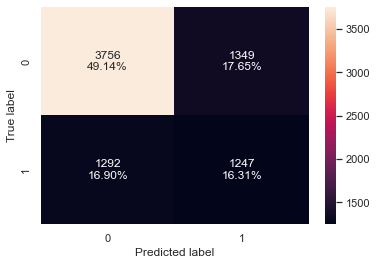

In [109]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* The decision tree is entirely overfitting the training data (all '1's).
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [110]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.18, 1: 0.72}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0    0.6545  0.491138   0.480354  0.485686


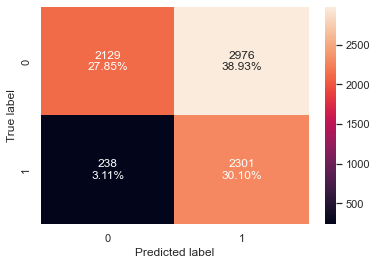

In [111]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The overfitting on training data remains; The model reduces false negatives to 3%. 
* Let's try some other models.

## Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.974714  0.936519    0.98666  0.960935
   Accuracy   Recall  Precision        F1
0  0.701596  0.43718   0.565749  0.493224


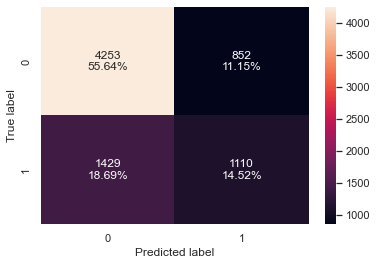

In [112]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print(bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier is still overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [113]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.994281  0.984974   0.997777  0.991334
   Accuracy    Recall  Precision        F1
0  0.721873  0.463568   0.606388  0.525446


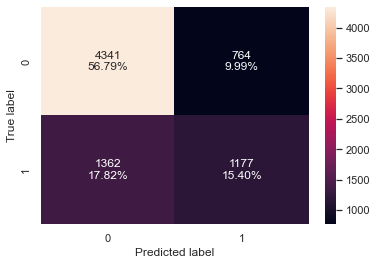

In [114]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print(bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* In this bagging model, hyperparameter tuning shows increases in f1 for both training and testing.
* Let's try now try boosting models.

## AdaBoost Classifier

   Accuracy    Recall  Precision       F1
0  0.733292  0.425967   0.650258  0.51474
   Accuracy    Recall  Precision        F1
0  0.731423  0.416699    0.64908  0.507556


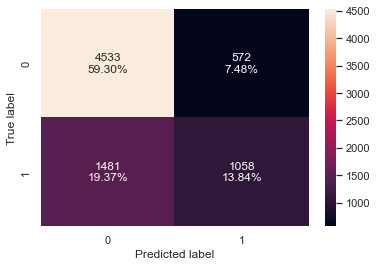

In [115]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print(ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low. 

### Hyperparameter Tuning

In [116]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.30000000000000004, n_estimators=30,
                   random_state=1)

   Accuracy    Recall  Precision        F1
0      0.75  0.500253   0.664052  0.570631
   Accuracy    Recall  Precision        F1
0   0.74686  0.493895   0.658613  0.564483


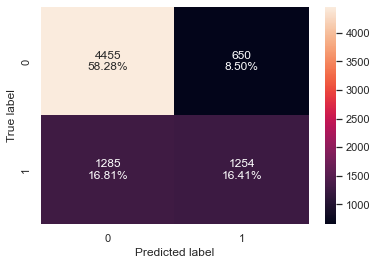

In [117]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

* The model performance has increased slightly but is only slightly better than random guessing. 

## Gradient Boosting Classifier

In [ ]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

* The gradient boosting classifier is showing less overfitting than previous models. 

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

* There is not much difference in the model performance after hyperparameter tuning.

## XGBoost Classifier

In [ ]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.  

## Random Forest Classifier

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random forest is giving a slightly higher test f1-score than decision trees but it is overfitting the training data (f1=.99916 and precision= 1).
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, "log2", "auto"],
    "max_samples": [0.7, 0.9, None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score have increased.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

* The overfitting has reduced slightly but there is not much difference in the model performance.

## Stacking Classifier

In [ ]:
estimators = [
    ("Random Forest", rf_estimator),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost with slightly less overfitting.

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

* The majority of the models are overfitting the training data in terms of f1-score.
* The tuned XGBoost is giving the highest f1-score on the test data.
* The stacking classifier has given the second-highest test f1-score.

### Feature importance of Tuned Random Forest

In [ ]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Annual_value is the most important feature in identifying candidate to be certified. 

In [ ]:
df.info()

## Conclusion:

- Based on our analysis, we can say that the employee most likely to be certified has: 
    - High annual value (salary on an annual scale); this is an indicator that the work they do is highly valued regardless of the total volume of hours worked. 
    - Intends to work for a large corporation.
    - Has higher education. The education measures of highschool, Bachelor's, Master's and Doctorate are all significant features and all influence selectivity. 
    - Has job experience.
    
- This model reinforces continued selection of the same type of candidates that were previously selected; it would be better if there was some measure of employer satisfaction or successful completion of one year of employment. Instead this model reinforces selection criteria that led to previous years selection, but does not measure value as a visa holder. 
    
- Although the model can offer some guidance on what features are significant in predicting certification of a visa for an employee desiring to work, the overall labor pool was short by 923,978 people. Thus, a better model would be to approve all (100%) appliants unless they fail a background check for felony in their country of origin. 